# Final Project
| |
|:---:|
|Selected content [From **COMPUTATIONAL PHYSICS**, 3rd Ed, 2015](http://physics.oregonstate.edu/~rubin/Books/CPbook/index.html) <br>RH Landau, MJ Paez, and CC Bordeianu (deceased) <br>Copyrights: <br> [Wiley-VCH, Berlin;](http://www.wiley-vch.de/publish/en/books/ISBN3-527-41315-4/) and [Wiley & Sons, New York](http://www.wiley.com/WileyCDA/WileyTitle/productCd-3527413154.html)<br>  R Landau, Oregon State Unv, <br>MJ Paez, Univ Antioquia,<br> C Bordeianu, Univ Bucharest, 2015.<br> Support by National Science Foundation.|

# The implementation of Computational Methods on the analysis of the motions of 2 and 3 body problems. 

# Fundamentals

In orbital mechanics, the force between two bodies is given as such


$$F^{(g)} = - \frac{G Mm} { r^2}$$

where $m$ and $M$ are the masses of both bodies(for reasons lets say big M is m1 and little m is m2), $r$ is the planet-CM distance, $G$ is the universal gravitational
constant, and the attractive force lies along the line connecting the
planet and the sun. This equation assumes that there are two bodies in the system acting on each other. However once you get above two and there are three or more bodies in the system, this changes the forces acting upon each body and thus the motions become less certain. 

The equation of force can be written down as a differential equation:

$$
M\frac{d^2r}{dt}=\frac{GMm}{r^3}r
$$

The a in $F = MA$ can also be expressed as the derivative of the velocity of an object. Also in this form the unit vector is shown as the r divided by the magnitude $\left| r \right|$


In this notebook. I am looking at 2 examples of 2 and 3 body problems in our universe.  To truly understand the grasp of Orbital Mechanics of N body objects, I will plot all my systems with 3d axes. This allows me to properly visualize the motions of these bodies. The animations for these systems will take up resources but it would be an interesting look. Numpy and Scipy will be used for the array calculations and visualizations will be handled by matplotlib. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
from scipy import integrate
from scipy.integrate import solve_ivp

# Our Nearest Neighbor: Looking at the Earth Moon System

In [2]:
# Constants
G = 6.67430e-11  # gravitational constant in m^3 kg^-1 s^-2
M_earth = 5.972e24  # mass of Earth in kg
M_moon = 7.348e22  # mass of Moon in kg
distance_earth_moon = 384400000  # average distance from Earth to Moon in meters

In [3]:
# Initial conditions
# Earth and Moon initially on the x-axis
x_earth_initial = -M_moon * distance_earth_moon / (M_earth + M_moon)
x_moon_initial = M_earth * distance_earth_moon / (M_earth + M_moon)
# Initial velocities to have circular orbits
v_earth_initial = np.sqrt(G * M_moon**2 / (distance_earth_moon * (M_earth + M_moon)))
v_moon_initial = np.sqrt(G * M_earth**2 / (distance_earth_moon * (M_earth + M_moon)))

# Define the differential equations
def equations_of_motion(t, y):
    x1, v1x, x2, v2x = y
    r = np.sqrt((x2 - x1)**2)
    a1 = G * M_moon / r**2
    a2 = G * M_earth / r**2
    return [v1x, a1, v2x, -a2]

# Initial state vector
initial_state = [x_earth_initial, v_earth_initial, x_moon_initial, v_moon_initial]

# Time span (one month)
t_span = [0, 30 * 24 * 3600]  # 30 days in seconds

# Solve the differential equations
solution = solve_ivp(equations_of_motion, t_span, initial_state, t_eval=np.linspace(t_span[0], t_span[1], 1000))

# Extract the solutions
x_earth, v_earth, x_moon, v_moon = solution.y


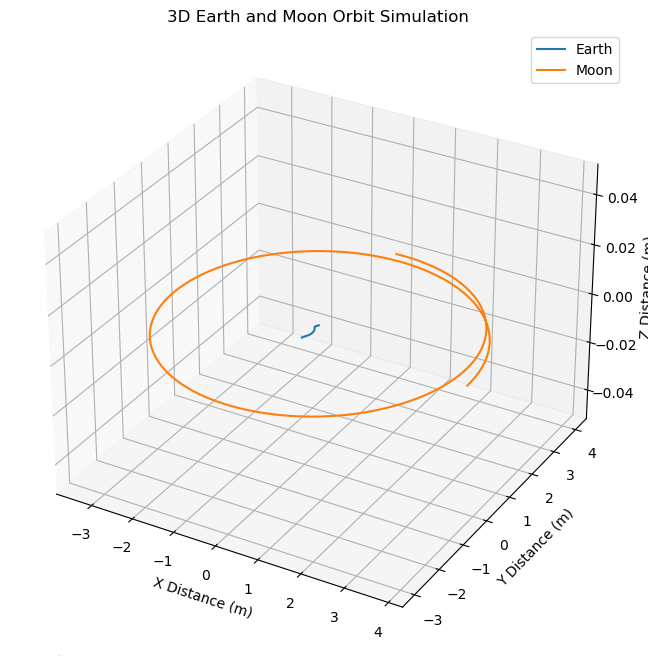

In [4]:
# Constants
G = 6.67430e-11  # gravitational constant in m^3 kg^-1 s^-2
M_earth = 5.972e24  # mass of Earth in kg
M_moon = 7.348e22  # mass of Moon in kg
distance_earth_moon = 384400000  # average distance from Earth to Moon in meters

from mpl_toolkits.mplot3d import Axes3D

# Initial conditions in 3D
# Positions
x_earth_initial_3d = [x_earth_initial, 0, 0]  # Earth starts on the x-axis
x_moon_initial_3d = [x_moon_initial, 0, 0]    # Moon starts on the x-axis
# Velocities (perpendicular to their position vectors for circular orbits)
v_earth_initial_3d = [0, v_earth_initial, 0]
v_moon_initial_3d = [0, v_moon_initial, 0]

# Define the 3D differential equations
def equations_of_motion_3d(t, y):
    x1, y1, z1, v1x, v1y, v1z, x2, y2, z2, v2x, v2y, v2z = y
    r = np.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)
    a1 = G * M_moon / r**2
    a2 = G * M_earth / r**2
    ax1 = a1 * (x2 - x1) / r
    ay1 = a1 * (y2 - y1) / r
    az1 = a1 * (z2 - z1) / r
    ax2 = a2 * (x1 - x2) / r
    ay2 = a2 * (y1 - y2) / r
    az2 = a2 * (z1 - z2) / r
    return [v1x, v1y, v1z, ax1, ay1, az1, v2x, v2y, v2z, ax2, ay2, az2]

# Initial state vector in 3D
initial_state_3d = [*x_earth_initial_3d, *v_earth_initial_3d, *x_moon_initial_3d, *v_moon_initial_3d]

# Solve the differential equations in 3D
solution_3d = solve_ivp(equations_of_motion_3d, t_span, initial_state_3d, t_eval=np.linspace(t_span[0], t_span[1], 1000))

# Extract the solutions in 3D
x_earth_3d, y_earth_3d, z_earth_3d, _, _, _, x_moon_3d, y_moon_3d, z_moon_3d, _, _, _ = solution_3d.y

# 3D Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the orbits
ax.plot(x_earth_3d, y_earth_3d, z_earth_3d, label='Earth')
ax.plot(x_moon_3d, y_moon_3d, z_moon_3d, label='Moon')

# Labels and title
ax.set_xlabel('X Distance (m)')
ax.set_ylabel('Y Distance (m)')
ax.set_zlabel('Z Distance (m)')
ax.set_title('3D Earth and Moon Orbit Simulation')
ax.legend()

plt.show()


The spheres representing the earth and moon are not visible. This is because in space, the distance between both objects is much more vast and from this perspective, the Earth and Moon would be comparable to the size of ants. To show the spheres, I will modify the code to show the earth and moon. Also the path of the lunar orbit does not seem to create a closed loop as it is affected by the earth's revolution. This would make the orbit visually similar to a helix as the moon orbits the earth. To further aid in visualizing this model, I will plot this graph again but with the inclusion of spheres for the Earth and the Moon. 

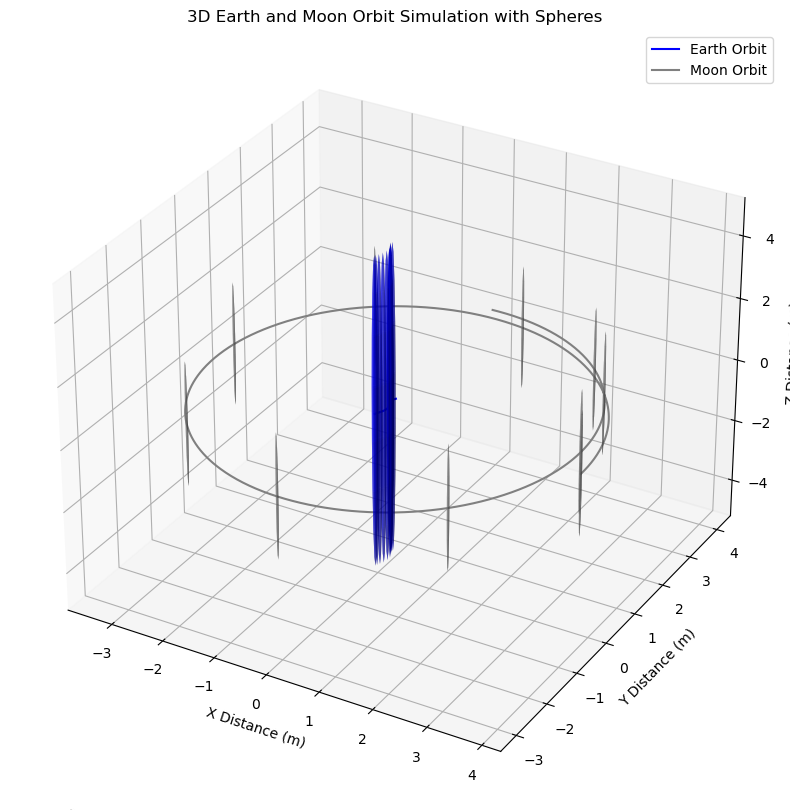

In [5]:
def plot_sphere(ax, center, radius, color):
    """
    Plot a sphere in a 3D plot.

    :param ax: The axis to plot on.
    :param center: A tuple (x, y, z) for the center of the sphere.
    :param radius: The radius of the sphere.
    :param color: The color of the sphere.
    """
    u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
    x = center[0] + radius * np.cos(u) * np.sin(v)
    y = center[1] + radius * np.sin(u) * np.sin(v)
    z = center[2] + radius * np.cos(v)
    ax.plot_surface(x, y, z, color=color, alpha=0.6)

# Earth and Moon radii for visualization (not to scale)
radius_earth = 5e6  # Exaggerated for visibility
radius_moon = 2e6   # Exaggerated for visibility

# Plotting with spheres
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the orbits
ax.plot(x_earth_3d, y_earth_3d, z_earth_3d, label='Earth Orbit', color='blue')
ax.plot(x_moon_3d, y_moon_3d, z_moon_3d, label='Moon Orbit', color='grey')

# Add spheres at a few positions
for i in range(0, len(x_earth_3d), len(x_earth_3d)//10):
    plot_sphere(ax, (x_earth_3d[i], y_earth_3d[i], z_earth_3d[i]), radius_earth, 'blue')
    plot_sphere(ax, (x_moon_3d[i], y_moon_3d[i], z_moon_3d[i]), radius_moon, 'grey')

# Labels, title, and legend
ax.set_xlabel('X Distance (m)')
ax.set_ylabel('Y Distance (m)')
ax.set_zlabel('Z Distance (m)')
ax.set_title('3D Earth and Moon Orbit Simulation with Spheres')
ax.legend()

plt.show()


The reason the path the earth is stretched is because that represnts it's motion as it orbits the sun. Also the scales of the axes have exaggerated the spheres. Multiple spheres represent different timesteps as the Earth and Moon move around each other. The Earth seems to wobble a bit but this is because there is a center of mass in this system and this center would be inside Earth but not in its center exactly. If the COM was in the core exactly, the earth wouldnt look like it wobbles within this graph.

Although two body problems are intresting puzzles, one of the greatest mathematical challenges was finding solutions to three body problems. The inclusion of a third body changes the way forces are calculated. To compensate for the additional body, another force term has to be added into the right hand side. The summation is just a representation of adding another force term

$$
M\frac{d^2r}{dt}=G\sum{\frac{Mm}{r^3}r}
$$


For this 3 body problem I will add the sun. The Earth-Sun-Moon is the most simple 3 body problem as the mass of the sun ensures that the Earth and Moon are negligible. This solution will expand on the previous one but the time span involved will be increased to a year as that is the orbital period of the Earth around the sun. 

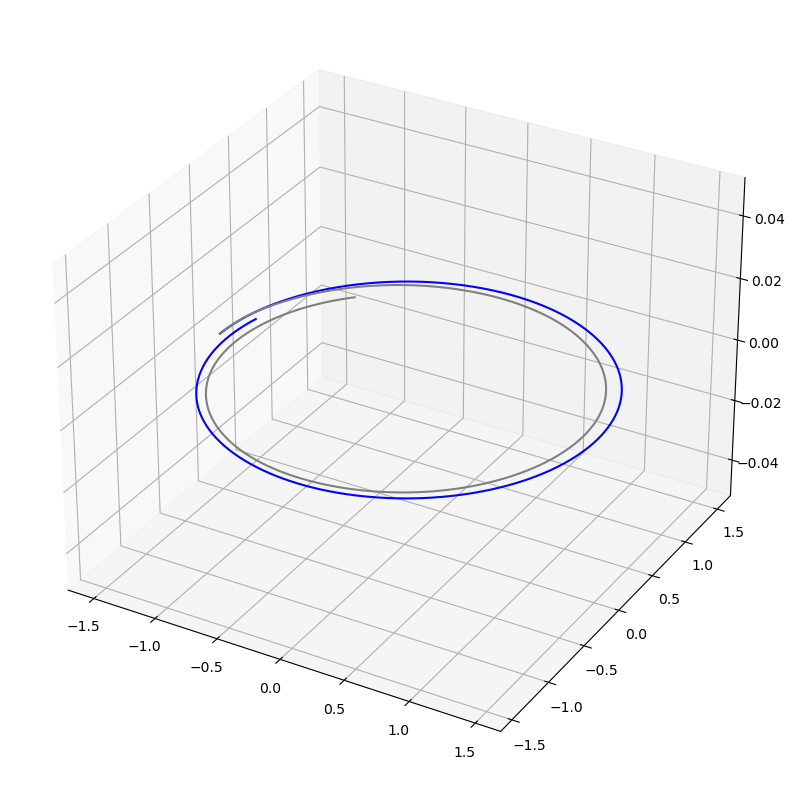

In [6]:
# Addition of constants and distances for 3 body problem 
# Gravitational constant
G = 6.67430e-11  # in m^3 kg^-1 s^-2

# Masses of the celestial bodies
M_earth = 5.972e24  # mass of Earth in kg
M_moon = 7.348e22  # mass of Moon in kg
M_sun = 1.989e30  # mass of Sun in kg

# Distances
distance_sun_earth = 1.496e11  # average distance from Sun to Earth in meters
distance_earth_moon = 384400000  # average distance from Earth to Moon in meters

t_span_3 = [0, 365 * 24 * 3600] # 1 year in seconds

# Three body equations functions considering the positions and velocities of each object

def three_body_equations(t, y):
    # Unpack current state
    x1, y1, z1, vx1, vy1, vz1, x2, y2, z2, vx2, vy2, vz2, x3, y3, z3, vx3, vy3, vz3 = y

    # Distances between bodies
    r12 = np.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)  # Earth-Moon
    r13 = np.sqrt((x3 - x1)**2 + (y3 - y1)**2 + (z3 - z1)**2)  # Earth-Sun
    r23 = np.sqrt((x3 - x2)**2 + (y3 - y2)**2 + (z3 - z2)**2)  # Moon-Sun

    # Earth's acceleration due to Moon and Sun
    ax1 = G * M_moon * (x2 - x1) / r12**3 + G * M_sun * (x3 - x1) / r13**3
    ay1 = G * M_moon * (y2 - y1) / r12**3 + G * M_sun * (y3 - y1) / r13**3
    az1 = G * M_moon * (z2 - z1) / r12**3 + G * M_sun * (z3 - z1) / r13**3

    # Moon's acceleration due to Earth and Sun
    ax2 = G * M_earth * (x1 - x2) / r12**3 + G * M_sun * (x3 - x2) / r23**3
    ay2 = G * M_earth * (y1 - y2) / r12**3 + G * M_sun * (y3 - y2) / r23**3
    az2 = G * M_earth * (z1 - z2) / r12**3 + G * M_sun * (z3 - z2) / r23**3

    # Sun's acceleration due to Earth and Moon
    ax3 = G * M_earth * (x1 - x3) / r13**3 + G * M_moon * (x2 - x3) / r23**3
    ay3 = G * M_earth * (y1 - y3) / r13**3 + G * M_moon * (y2 - y3) / r23**3
    az3 = G * M_earth * (z1 - z3) / r13**3 + G * M_moon * (z2 - z3) / r23**3

    return [vx1, vy1, vz1, ax1, ay1, az1, vx2, vy2, vz2, ax2, ay2, az2, vx3, vy3, vz3, ax3, ay3, az3]

# Redefine initial conditions
initial_conditions = [
    -distance_sun_earth, 0, 0, 0, 29780, 0,  # Earth
    -distance_sun_earth + distance_earth_moon, 0, 0, 0, 29780 + 1022, 0,  # Moon
    0, 0, 0, 0, 0, 0  # Sun (stationary for simplification)
]

# Solve the differential equations again
solution = solve_ivp(three_body_equations, t_span_3, initial_conditions, t_eval=np.linspace(t_span_3[0], t_span_3[1], 500))

# Extracting the solutions for Earth, Moon, and Sun
x_earth, y_earth, z_earth = solution.y[0], solution.y[1], solution.y[2]
x_moon, y_moon, z_moon = solution.y[6], solution.y[7], solution.y[8]
x_sun, y_sun, z_sun = solution.y[12], solution.y[13], solution.y[14]

# Plotting
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Earth's and Moon's orbits
ax.plot(x_earth, y_earth, z_earth, label='Earth Orbit', color='blue')
ax.plot(x_moon, y_moon, z_moon, label='Moon Orbit', color='grey')

# Sun as a large sphere
radius_sun = 200

One thing to observe is that during the orbital period of the Earth, the moon is being pulled along in its revolution. This is visualized with the gray path representing the Moon's motion over the year which is trailing the Earth, whose path is represented in blue. Unfortuately, the sun isn't visble. This is because this graph is considering the true scale of our solar system. To remedy this problem I will add an enlarged sphere to this graph. 

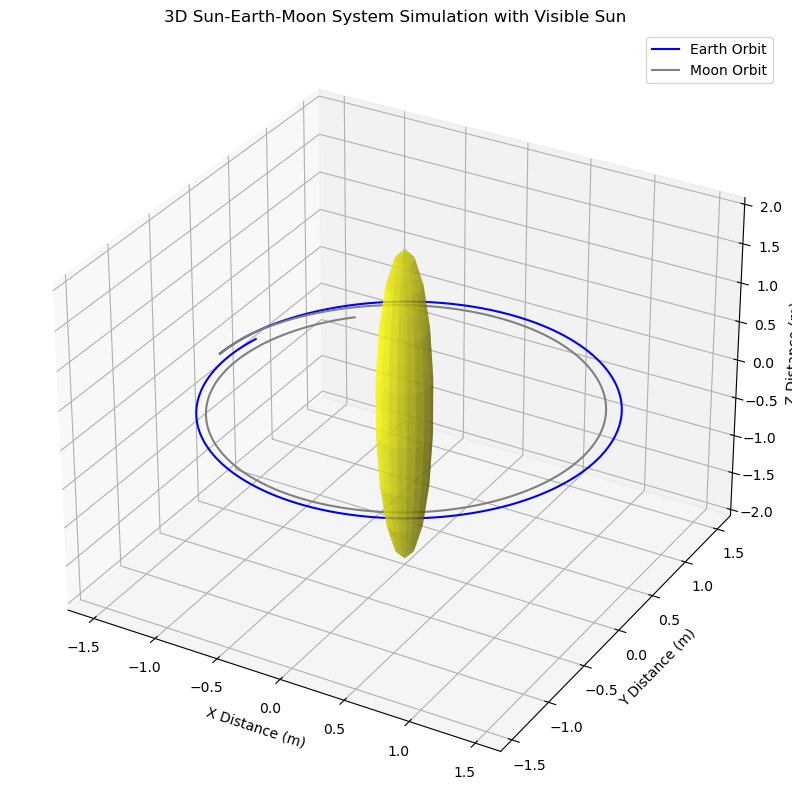

In [7]:
def plot_sphere(ax, center, radius, color):
    """Plot a sphere in a 3D plot."""
    u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
    x = center[0] + radius * np.cos(u) * np.sin(v)
    y = center[1] + radius * np.sin(u) * np.sin(v)
    z = center[2] + radius * np.cos(v)
    ax.plot_surface(x, y, z, color=color, alpha=0.6)

# Exaggerated radius for the Sun for better visibility
radius_sun = 2e10  # Significantly exaggerated

# Re-plotting with a visible Sun
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the orbits
ax.plot(x_earth, y_earth, z_earth, label='Earth Orbit', color='blue')
ax.plot(x_moon, y_moon, z_moon, label='Moon Orbit', color='grey')

# Plot the Sun as a large sphere
plot_sphere(ax, (0, 0, 0), radius_sun, 'yellow')

# Labels, title, and legend
ax.set_xlabel('X Distance (m)')
ax.set_ylabel('Y Distance (m)')
ax.set_zlabel('Z Distance (m)')
ax.set_title('3D Sun-Earth-Moon System Simulation with Visible Sun')
ax.legend()

plt.show()


I added the sun as an enlarged sphere for the purposes of visbility. Like with our Earth-Moon example, the sun looks elongated here. This is stemming from the fact the axes are stretched in different orders of magnitude. 

Looking at the Earth-Moon-Sun system is an interesting example for analysing n body problems. However another example of an n-body problem would be binary star systems. Unlike the restricted nature of these problems, the masses of each of the bodies is equal. As a result, they would be excerting similar forces on each other and the trajectories of these objects wouldn't be as simple as observed above. To demonstrate, let us look at the Alpha Centauri System which may have 3 bodies but is functionally a binary system due to the negligible mass of Proxima Centauri, the third object. For this approach, we are gonna have to consider a quantity $K$. This quantity reperesents all the parameters in this system and would simplify the calculation process for this two and three body problem as many of these units are magnitudes seperated from each other. In this calculation, two $K$ quantities are used. $K$ involves the constant $G$ and the orbital period of the system an

In [8]:
# Parameters
#Reference quantities
m_sol=1.989e+30 #kg #mass of the sun
r_ac=5.326e+12 #m #distance between stars in Alpha Centauri
v_es=30000 #m/s #relative velocity of earth around the sun
t_ac=79.91*365*24*3600*0.51 #s #orbital period of Alpha Centauri
#Net constants
K1=G*t_ac*m_sol/(r_ac**2*v_es)
K2=v_es*t_ac/r_ac

In [9]:
#Define masses when compared to solar mass. 
m1=1.1 #Alpha Centauri A
m2=0.907 #Alpha Centauri B
#Define initial position vectors
r1=[-0.5,0,0] #m
r2=[0.5,0,0] #m
#Convert pos vectors to arrays
r1=np.array(r1,dtype="float64")
r2=np.array(r2,dtype="float64")
#Find Centre of Mass
r_com=(m1*r1+m2*r2)/(m1+m2)
#Define initial velocities
v1=[0.01,0.01,0] #m/s
v2=[-0.05,0,-0.1] #m/s
#Convert velocity vectors to arrays
v1=np.array(v1,dtype="float64")
v2=np.array(v2,dtype="float64")
#Find velocity of COM
v_com=(m1*v1+m2*v2)/(m1+m2)

In [10]:
#A function defining the equations of motion 
def TwoBodyEquations(w,t,G,m1,m2):
    r1=w[:3]
    r2=w[3:6]
    v1=w[6:9]
    v2=w[9:12]
    r=sci.linalg.norm(r2-r1) #Calculate magnitude or norm of vector
    dv1bydt=K1*m2*(r2-r1)/r**3
    dv2bydt=K1*m1*(r1-r2)/r**3
    dr1bydt=K2*v1
    dr2bydt=K2*v2
    r_derivs=np.concatenate((dr1bydt,dr2bydt))
    derivs=np.concatenate((r_derivs,dv1bydt,dv2bydt))
    return derivs

In [11]:
#Package initial parameters
init_params=np.array([r1,r2,v1,v2]) #create array of initial params
init_params=init_params.flatten() #flatten array to make it 1D
time_span=np.linspace(0,8,500) #8 orbital periods and 500 points
#Run the ODE solver
two_body_sol=integrate.odeint(TwoBodyEquations,init_params,time_span,args=(G,m1,m2))

In [12]:
r1_sol=two_body_sol[:,:3]
r2_sol=two_body_sol[:,3:6]

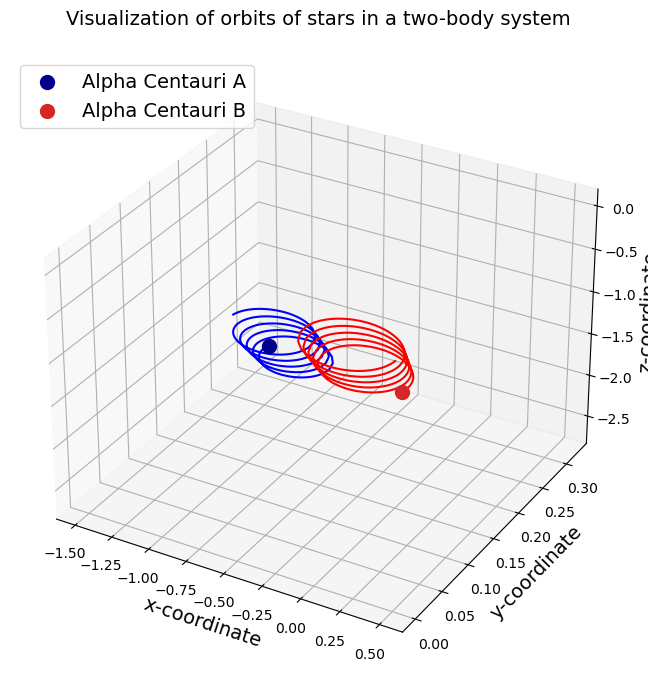

In [13]:
#Create figure
fig=plt.figure(figsize=(8,8))
#Create 3D axes
ax=fig.add_subplot(111,projection="3d")
#Plot the orbits
ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,2],color="blue")
ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,2],color="red")
#Plot the final positions of the stars
ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="darkblue",marker="o",s=100,label="Alpha Centauri A")
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="tab:red",marker="o",s=100,label="Alpha Centauri B")
#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a two-body system\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)

Observing this, this is a clean looking graph. It shows how the two stars paths move over a certain time period. The two dots represent the stars at their current period. However there is also another perspective that could be useful. Unlike the previous situation, the center of mass would be a point in space between these two bodies as they are close in mass. To calculate the location of this COM, The following equation would be used

$$
COM=\frac{m_a*r_a\,\,+\,\,m_b*r_b}{m_a+m_n}
$$


This center of mass is subtracted from the positions of the two stars to find the centers of mass for these two stars. These are then used to plot a graph from the center of mass. 

In [14]:
#Find location of COM
rcom_sol=(m1*r1_sol+m2*r2_sol)/(m1+m2)
#Find location of Alpha Centauri A w.r.t COM
r1com_sol=r1_sol-rcom_sol
#Find location of Alpha Centauri B w.r.t COM
r2com_sol=r2_sol-rcom_sol

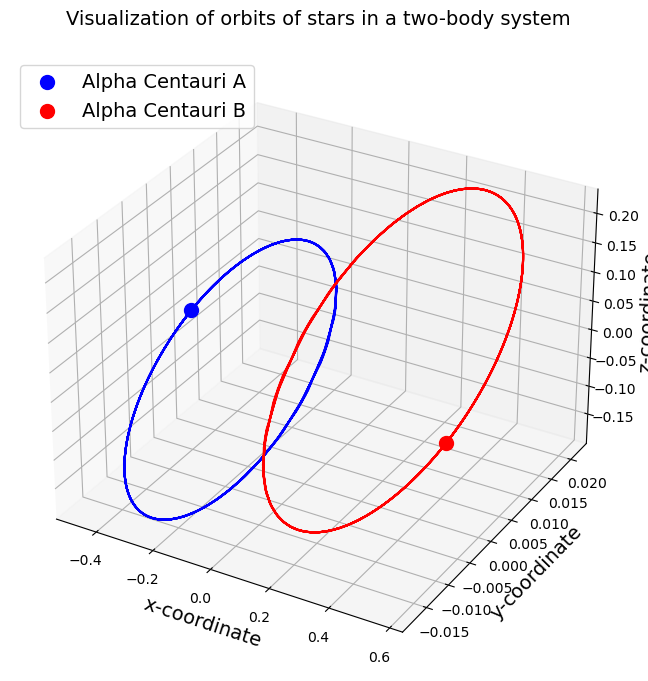

In [15]:
#Create figure
fig=plt.figure(figsize=(8,8))
#Create 3D axes
ax=fig.add_subplot(111,projection="3d")
#Plot the orbits
ax.plot(r1com_sol[:,0],r1com_sol[:,1],r1com_sol[:,2],color="blue")
ax.plot(r2com_sol[:,0],r2com_sol[:,1],r2com_sol[:,2],color="red")
#Plot the final positions of the stars
ax.scatter(r1com_sol[-1,0],r1com_sol[-1,1],r1com_sol[-1,2],color="blue",marker="o",s=100,label="Alpha Centauri A")
ax.scatter(r2com_sol[-1,0],r2com_sol[-1,1],r2com_sol[-1,2],color="red",marker="o",s=100,label="Alpha Centauri B")
#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a two-body system\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)

This system looks orderly for now. However the addition of a third body will most certainly change the way the stars orbit each other. Let us add another star that is around the same mass of our sun. The observations for this situation will be interesting. 

In [16]:
#Mass of the Third Star
m3=1.0 #Third Star
#Position of the Third Star
r3=[0,1,0] #m
r3=np.array(r3,dtype="float64")
#Velocity of the Third Star
v3=[0,-0.01,0]
v3=np.array(v3,dtype="float64")

In [17]:
#Updated COM formula
r_com_3=(m1*r1+m2*r2+m3*r3)/(m1+m2+m3)
#Updated velocity of COM formula
v_com_3=(m1*v1+m2*v2+m3*v3)/(m1+m2+m3)

In [18]:
#Three Body Function
def ThreeBodyEquations(w,t,G,m1,m2,m3):
    r1=w[:3]
    r2=w[3:6]
    r3=w[6:9]
    v1=w[9:12]
    v2=w[12:15]
    v3=w[15:18]
    r12=sci.linalg.norm(r2-r1)
    r13=sci.linalg.norm(r3-r1)
    r23=sci.linalg.norm(r3-r2)
    
    dv1bydt=K1*m2*(r2-r1)/r12**3+K1*m3*(r3-r1)/r13**3
    dv2bydt=K1*m1*(r1-r2)/r12**3+K1*m3*(r3-r2)/r23**3
    dv3bydt=K1*m1*(r1-r3)/r13**3+K1*m2*(r2-r3)/r23**3
    dr1bydt=K2*v1
    dr2bydt=K2*v2
    dr3bydt=K2*v3
    r12_derivs=np.concatenate((dr1bydt,dr2bydt))
    r_derivs=np.concatenate((r12_derivs,dr3bydt))
    v12_derivs=np.concatenate((dv1bydt,dv2bydt))
    v_derivs=np.concatenate((v12_derivs,dv3bydt))
    derivs=np.concatenate((r_derivs,v_derivs))
    return derivs

In [19]:
#Packaging initial parameters
init_params=np.array([r1,r2,r3,v1,v2,v3]) #Initial parameters
init_params=init_params.flatten() #Flatten to make 1D array
time_span=np.linspace(0,20,500) #20 orbital periods and 500 points
#ODE solver
three_body_sol=integrate.odeint(ThreeBodyEquations,init_params,time_span,args=(G,m1,m2,m3))

In [20]:
r1_sol_3=three_body_sol[:,:3]
r2_sol_3=three_body_sol[:,3:6]
r3_sol_3=three_body_sol[:,6:9]

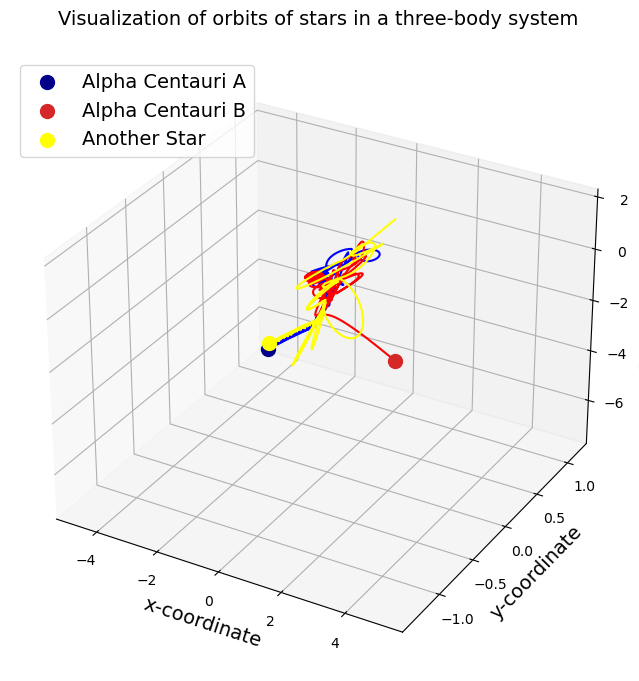

In [21]:
#Create figure
fig=plt.figure(figsize=(8,8))
#Create 3D axes
ax=fig.add_subplot(111,projection="3d")
#Plot the orbits
ax.plot(r1_sol_3[:,0],r1_sol_3[:,1],r1_sol_3[:,2],color="blue")
ax.plot(r2_sol_3[:,0],r2_sol_3[:,1],r2_sol_3[:,2],color="red")
ax.plot(r3_sol_3[:,0],r3_sol_3[:,1],r3_sol_3[:,2],color="yellow")
#Plot the final positions of the stars
ax.scatter(r1_sol_3[-1,0],r1_sol_3[-1,1],r1_sol_3[-1,2],color="darkblue",marker="o",s=100,label="Alpha Centauri A")
ax.scatter(r2_sol_3[-1,0],r2_sol_3[-1,1],r2_sol_3[-1,2],color="tab:red",marker="o",s=100,label="Alpha Centauri B")
ax.scatter(r3_sol_3[-1,0],r3_sol_3[-1,1],r3_sol_3[-1,2],color="yellow",marker="o",s=100,label ="Another Star")
#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a three-body system\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)

The system looks chaotic. This wouldn't be surprising as the addition of the third star affects the orbits of both stars. However this is the result of when 3 nearly equally massive objects are within each other's vicinity. The path one of these objects will take will be affected by the other two's gravity. Considering how this turned out, it is no surprise it took mathematicians and physicists centuries to find solutions.

# Conclusions

Doing this project took a bit of time and it was really challenging. However, when I did it, I learned much from reading the literature and examples of other successful implementations of two and three body problems. This also furthered my interest in the mathematics behind these phenomena and hopefully I could tackle these problems again. On a related note, I think I will get to the Three Body Problem by Liu Cixin once I'm done with my current book I'm reading. 

# Sources

Britannica, The Editors of Encyclopaedia. "Alpha Centauri". Encyclopedia Britannica, 9 Sep. 2023, https://www.britannica.com/place/Alpha-Centauri. Accessed 15 December 2023.

http://arborjs.org/docs/barnes-hutLinks to an external site.

https://jfuchs.hotell.kau.se/kurs/amek/prst/04_3bdy.pdf

https://www.cs.cmu.edu/~scandal/alg/nbody.htmlLinks to an external site. 

 

Kenneth R Meyer,

Periodic solutions of the N-body problem,

Journal of Differential Equations,

Volume 39, Issue 1,

1981,

Pages 2-38,